# Import the Packages

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Dataset Creation

**Convert video into Frames**

In [ ]:
!ffmpeg -i "/content/drive/MyDrive/sign_video.mp4" -vf fps=30 "/content/Dataset/img%04d.png"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

**Check numbers of images in the folder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# folder path
dir_path = r'/content/Dataset'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 2287


# Pre-processing


(1920, 1080, 3)


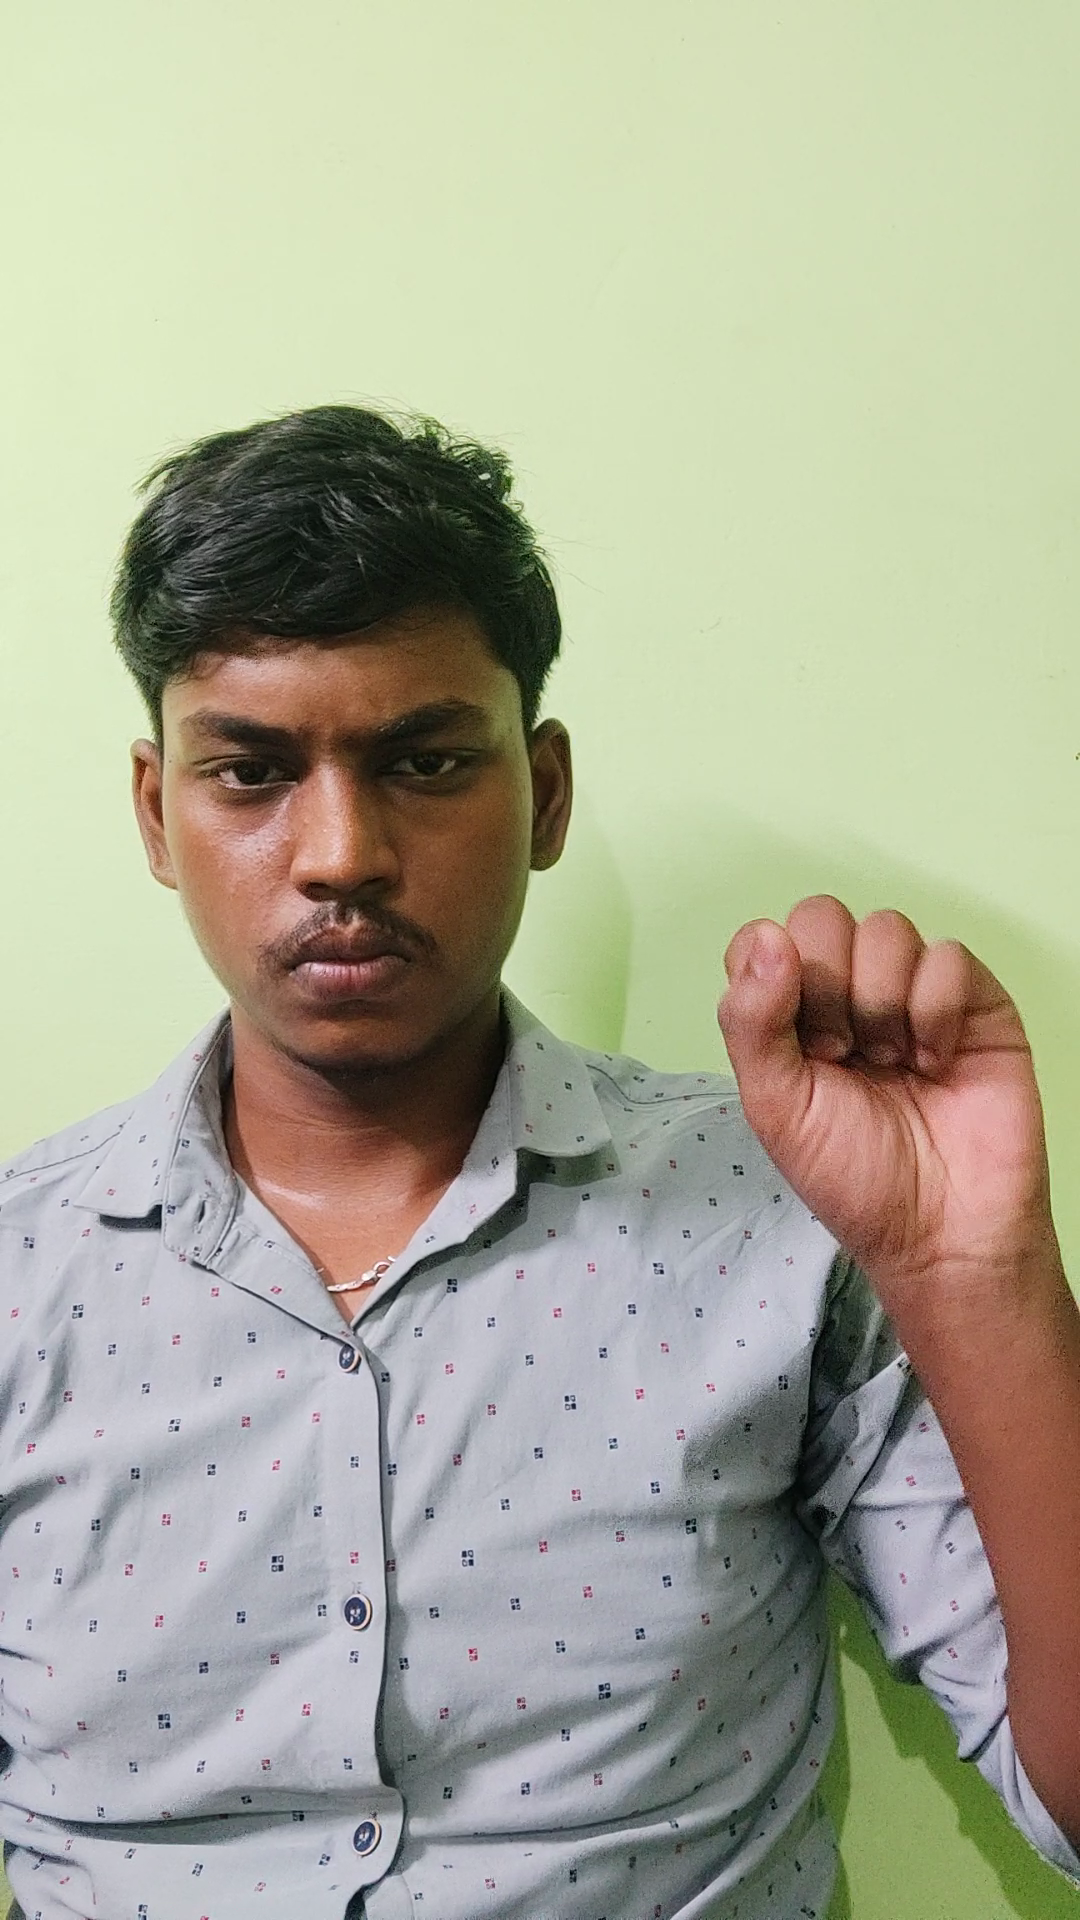

In [ ]:
#Displaying sample image
image_1 = cv2.imread("/content/Dataset/img0100.png")

print(image_1.shape)

cv2_imshow(image_1)

**Crop and resizing**

(1920, 1080, 3)


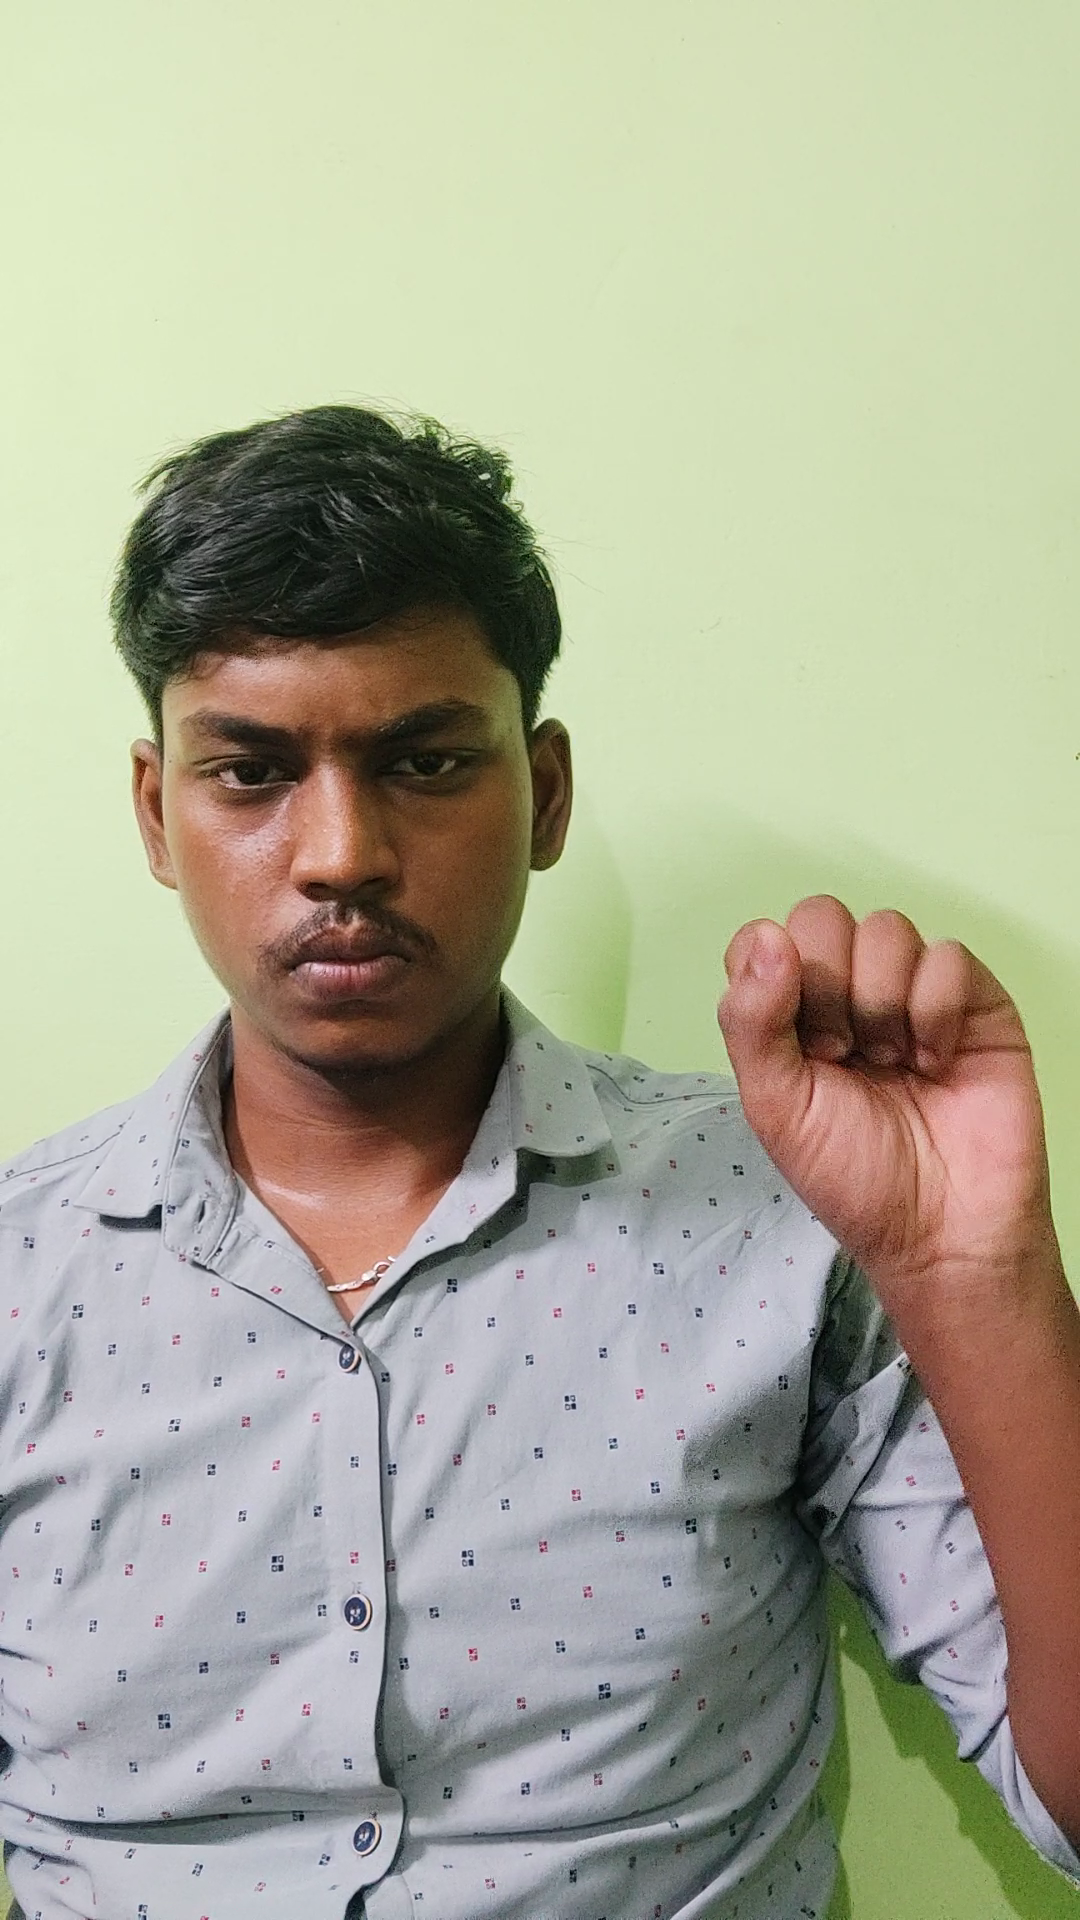

(256, 256, 3)


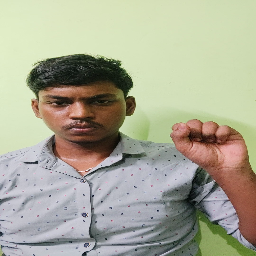

In [ ]:
image_1_crp = image_1[:,0:1920] # we are using array indexing to crop an image

print(image_1_crp.shape)

cv2_imshow(image_1_crp)

image_1_resize = cv2.resize(image_1_crp,(256,256))

print(image_1_resize.shape)

cv2_imshow(image_1_resize)

**Converting the image to Black and white**

(256, 256)


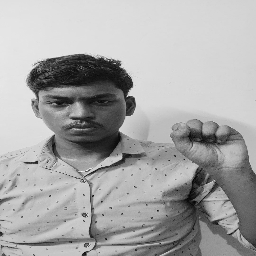

In [ ]:
image_1_b_w = cv2.cvtColor(image_1_resize, cv2.COLOR_BGR2GRAY )

print(image_1_b_w.shape)

cv2_imshow(image_1_b_w)

**Definning a Function to Pre-processing**

In [ ]:
from os import listdir

frame_dir = "/content/Dataset"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/Images_after_cropped"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

def crop_resize_black_img(img):
  image_1_crp = img[:,0:1920]
  image_1_resize = cv2.resize(image_1_crp,(256,256))
  image_1_b_w = cv2.cvtColor(image_1_resize, cv2.COLOR_BGR2GRAY )
  return image_1_b_w

for image_nm in frame_dir_lst:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  img_after_preprocess = crop_resize_black_img(img)
  cv2.imwrite(os.path.join(output_dir,image_nm),img_after_preprocess)


In [ ]:
dir_path = r'/content/Images_after_cropped'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 2287


In [ ]:
frame_dir = "/content/Images_after_cropped"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/img_after_absdiff"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

def abs_diff(img1,img2):
  absdiff = cv2.absdiff(img1,img2)
  return absdiff

for i in range(0,len(frame_dir_lst)-1):
  curr_img = frame_dir_lst[i]
  next_img = frame_dir_lst[i+1]
  img1 = cv2.imread(os.path.join(frame_dir,curr_img))
  img2 = cv2.imread(os.path.join(frame_dir,next_img))
  absdiff = abs_diff(img1, img2)
  cv2.imwrite(os.path.join(output_dir,curr_img),absdiff)

In [ ]:
dir_path = r'/content/img_after_absdiff'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

FileNotFoundError: ignored

**Zip the images** (Inorder to split them into different classes)

In [ ]:
!zip -r -q Images_after_cropped.zip Images_after_cropped

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [ ]:
dir_path = r'/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned Flipped'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1000


In [ ]:
frame_dir = "/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned Flipped"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

for i in range(0,len(frame_dir_lst)):
  curr_img = frame_dir_lst[i]
  img = cv2.imread(os.path.join(frame_dir,curr_img))
  img_flip = cv2.flip(img,3)
  cv2.imwrite(os.path.join(output_dir,curr_img),img_flip)

In [ ]:
image_1 = cv2.imread("/content/Read/inf0024.png")
image_1_flip = cv2.flip(image_1,3)

In [ ]:
dir_path = r'/content/drive/MyDrive/Dinesh Sign Identfication/Signed'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1256


In [ ]:
frame_dir = "/content/drive/MyDrive/Unsigned"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Unsigned Flipped"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

for i in range(0,len(frame_dir_lst)-1):
  curr_img = frame_dir_lst[i]
  img = cv2.imread(os.path.join(frame_dir,curr_img))
  img_flip = cv2.flip(img,3)
  cv2.imwrite(os.path.join(output_dir,curr_img),img_flip)

In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [ ]:
dir_path = r'/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned Flipped Rotate'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1000


In [ ]:
frame_dir = "/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned Flipped"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned Flipped Rotate"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

for i in range(0,len(frame_dir_lst)):
  curr_img = frame_dir_lst[i]
  img = cv2.imread(os.path.join(frame_dir,curr_img))
  img_rotate= rotate_image(img,20)
  cv2.imwrite(os.path.join(output_dir,curr_img),img_rotate)

In [ ]:
frame_dir = "/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Dinesh Sign Identfication/UNSIGNED"

if not os.path.exists(output_dir):
  os.mkdir(output_dir)

for i in range(1000):
  curr_img = frame_dir_lst[i]
  img = cv2.imread(os.path.join(frame_dir,curr_img))
  cv2.imwrite(os.path.join(output_dir,curr_img),img)

In [ ]:
import os
def main():
   
    folder = "/content/drive/MyDrive/Dinesh Sign Identfication/Unsigned Rotate"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"Unsigned Rotate {str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
main()